In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [207]:
df = pd.read_csv('C:/Users/mathilde.binet/Desktop/PIF/2907/market_data_pd (3).csv',sep = ',')
#df1 = df[["Debt / Common Equity","Debt/EBITDA","EBITDA"]]

In [221]:
df = df.drop(columns=['Unnamed: 0','Ask Price', 'Mid Price','Bid Price','Ticker_x','Ticker_y','Reference Security','Cpn'])

In [222]:
df

,Issuer Name,Maturity,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y
0,Alandsbanken Abp,09/13/2021,4.73005,4.84431,684.499,33.1593,NaN,NaN,NaN,87.2526,72.7382,275.5,NaN,NaN,0.995909
1,Afflelou SAS,05/19/2026,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.135456
2,Afflelou SAS,05/19/2027,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.113669
3,Anglo American Capital PLC,03/28/2022,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.636872
4,Anglo American Capital PLC,04/03/2023,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.319589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Banco Bilbao Vizcaya Argentaria SA,02/10/2027,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.097019
599,Banco Bilbao Vizcaya Argentaria SA,03/24/2027,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.118316
600,Banco Bilbao Vizcaya Argentaria SA,02/22/2029,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.083851
601,Banco Bilbao Vizcaya Argentaria SA,01/16/2030,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.079718


In [223]:
corr_df = df.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                                          Average Equity / Average Assets  \
Average Equity / Average Assets                                  1.000000   
Common Eqty / Tot Assets                                         0.987087   
Debt / Common Equity                                            -0.130597   
Debt/Assets                                                     -0.166206   
Debt/EBITDA                                                     -0.225728   
EBITDA                                                          -0.014595   
Int Exp / Avg Int Bear Liab                                      0.015760   
Tot Debt / Tot Capital                                          -0.400026   
Tot Loans to Tot Assets                                          0.683741   
Tot Risk-Based Cap                                               0.167018   
Earnings Assets / Int Bear Liab                                 -0.217955   
Total Expenses to Average Earning Assets      

In [224]:
corr = abs(corr_df)

In [225]:
corr

,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y
Average Equity / Average Assets,1.000000,0.987087,0.130597,0.166206,0.225728,0.014595,0.015760,0.400026,0.683741,0.167018,0.217955,NaN,0.052511
Common Eqty / Tot Assets,0.987087,1.000000,0.125256,0.210488,0.260866,0.006015,0.021118,0.426848,0.681556,0.150536,0.204757,NaN,0.048093
Debt / Common Equity,0.130597,0.125256,1.000000,0.283294,0.203151,0.031835,0.282230,0.176316,0.308268,0.273943,0.146827,NaN,0.046226
Debt/Assets,0.166206,0.210488,0.283294,1.000000,0.328969,0.038294,0.454806,0.228068,0.487345,0.380663,0.324170,NaN,0.101570
Debt/EBITDA,0.225728,0.260866,0.203151,0.328969,1.000000,0.196344,0.539706,0.364453,1.000000,NaN,0.383409,NaN,0.003363
EBITDA,0.014595,0.006015,0.031835,0.038294,0.196344,1.000000,0.562148,0.013057,0.227271,0.976669,0.109229,NaN,0.017455
Int Exp / Avg Int Bear Liab,0.015760,0.021118,0.282230,0.454806,0.539706,0.562148,1.000000,0.280267,0.410208,0.036187,0.288992,NaN,0.197326
Tot Debt / Tot Capital,0.400026,0.426848,0.176316,0.228068,0.364453,0.013057,0.280267,1.000000,0.215328,0.392096,0.108768,NaN,0.198044
Tot Loans to Tot Assets,0.683741,0.681556,0.308268,0.487345,1.000000,0.227271,0.410208,0.215328,1.000000,0.400596,0.253157,NaN,0.070102
Tot Risk-Based Cap,0.167018,0.150536,0.273943,0.380663,NaN,0.976669,0.036187,0.392096,0.400596,1.000000,0.003879,NaN,0.001647


# Corrélations entre variables explicatives

Text(0.5, 1.0, 'Matrice de corrélation des variables')

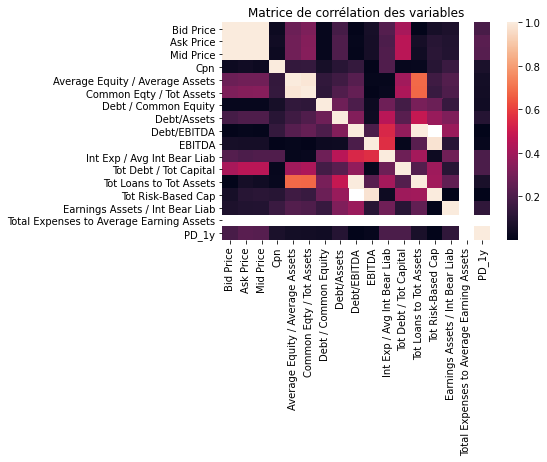

In [214]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.title('Matrice de corrélation des variables')

In [16]:
corr_df

,Cpn,Average Equity /,Common Eqty / Tot Assets,Debt/Assets,Debt/EBITDA,FCF/Tot Dbt,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Total Debt / EV,Tot Debt,Earnings Assets / Int Bear Liab,Total Expenses to Average Ea
Cpn,1.000000,0.415730,0.409999,-0.174883,-0.200175,0.095753,0.076914,-0.490483,0.230188,-0.067900,-0.039534,0.590169,0.034998
Average Equity /,0.415730,1.000000,0.993704,-0.403804,-0.448883,0.088208,-0.329034,-0.854558,0.190693,-0.450264,-0.120560,-0.251087,0.349250
Common Eqty / Tot Assets,0.409999,0.993704,1.000000,-0.394513,-0.452977,0.120917,-0.319590,-0.862734,0.174480,-0.469299,-0.120035,-0.268393,0.410496
Debt/Assets,-0.174883,-0.403804,-0.394513,1.000000,0.684752,-0.525372,0.640570,0.697870,0.562813,0.206096,-0.272991,-0.397581,-0.177429
Debt/EBITDA,-0.200175,-0.448883,-0.452977,0.684752,1.000000,-0.416810,-0.581659,0.631556,-1.000000,0.524659,0.022736,1.000000,1.000000
FCF/Tot Dbt,0.095753,0.088208,0.120917,-0.525372,-0.416810,1.000000,0.135798,-0.391417,-0.871883,-0.449253,0.010479,0.113123,NaN
Int Exp / Avg Int Bear Liab,0.076914,-0.329034,-0.319590,0.640570,-0.581659,0.135798,1.000000,0.597651,0.451624,-1.000000,-0.450686,0.294090,0.437653
Tot Debt / Tot Capital,-0.490483,-0.854558,-0.862734,0.697870,0.631556,-0.391417,0.597651,1.000000,0.305590,0.611953,-0.016460,-0.109346,-0.403406
Tot Loans to Tot Assets,0.230188,0.190693,0.174480,0.562813,-1.000000,-0.871883,0.451624,0.305590,1.000000,-1.000000,-0.377998,0.315189,0.357682
Total Debt / EV,-0.067900,-0.450264,-0.469299,0.206096,0.524659,-0.449253,-1.000000,0.611953,-1.000000,1.000000,0.689070,-1.000000,-1.000000


In [215]:
#renvoyer tous les duos avec une corrélation au dessus d'un certain seuil 

def high_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] > seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 

In [216]:
def low_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] <= seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 

In [217]:
high_corr(corr_df, 0.2)

['Ask Price AND Bid Price',
 'Mid Price AND Bid Price',
 'Mid Price AND Ask Price',
 'Average Equity / Average Assets AND Bid Price',
 'Average Equity / Average Assets AND Ask Price',
 'Average Equity / Average Assets AND Mid Price',
 'Common Eqty / Tot Assets AND Bid Price',
 'Common Eqty / Tot Assets AND Ask Price',
 'Common Eqty / Tot Assets AND Mid Price',
 'Common Eqty / Tot Assets AND Average Equity / Average Assets',
 'Debt/Assets AND Ask Price',
 'Debt/Assets AND Mid Price',
 'Debt/Assets AND Common Eqty / Tot Assets',
 'Debt/Assets AND Debt / Common Equity',
 'Debt/EBITDA AND Average Equity / Average Assets',
 'Debt/EBITDA AND Common Eqty / Tot Assets',
 'Debt/EBITDA AND Debt / Common Equity',
 'Debt/EBITDA AND Debt/Assets',
 'Int Exp / Avg Int Bear Liab AND Bid Price',
 'Int Exp / Avg Int Bear Liab AND Ask Price',
 'Int Exp / Avg Int Bear Liab AND Mid Price',
 'Int Exp / Avg Int Bear Liab AND Cpn',
 'Int Exp / Avg Int Bear Liab AND Debt / Common Equity',
 'Int Exp / Avg Int B

In [196]:
low_corr(corr_df, 0.2)

['Bid Price AND Unnamed: 0',
 'Ask Price AND Unnamed: 0',
 'Mid Price AND Unnamed: 0',
 'Cpn AND Unnamed: 0',
 'Cpn AND Bid Price',
 'Cpn AND Ask Price',
 'Cpn AND Mid Price',
 'Average Equity / Average Assets AND Unnamed: 0',
 'Average Equity / Average Assets AND Cpn',
 'Common Eqty / Tot Assets AND Unnamed: 0',
 'Common Eqty / Tot Assets AND Cpn',
 'Debt / Common Equity AND Unnamed: 0',
 'Debt / Common Equity AND Bid Price',
 'Debt / Common Equity AND Ask Price',
 'Debt / Common Equity AND Mid Price',
 'Debt / Common Equity AND Cpn',
 'Debt / Common Equity AND Average Equity / Average Assets',
 'Debt / Common Equity AND Common Eqty / Tot Assets',
 'Debt/Assets AND Unnamed: 0',
 'Debt/Assets AND Bid Price',
 'Debt/Assets AND Ask Price',
 'Debt/Assets AND Mid Price',
 'Debt/Assets AND Cpn',
 'Debt/Assets AND Average Equity / Average Assets',
 'Debt/Assets AND Common Eqty / Tot Assets',
 'Debt/EBITDA AND Bid Price',
 'Debt/EBITDA AND Ask Price',
 'Debt/EBITDA AND Mid Price',
 'Debt/EBIT

In [159]:
df1 = pd.read_csv('C:/Users/mathilde.binet/Desktop/PIF/market_data_pd (2).csv', sep = ';')

In [160]:
df1

,Unnamed: 0,Unnamed: .1,Issuer Name,Mid Price,Cpn,Maturity,Average Equity /,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,...,FCF/Tot Dbt,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Total Debt / EV,Tot Risk-Based Cap,Tot Debt,Earnings Assets / Int Bear Liab,Total Expenses to Average Ea,PD_1y
0,NaN,84,Office Public de l'Habitat du,NaN,1.50,12/17/27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085863
1,1.0,85,Raiffeisenlandesbank Oberoe,63.47,NaN,12/15/27,9.8,9.45,661.67,62.54,...,NaN,NaN,86.44,5.95,NaN,4781.47,3373.98,14.45,NaN,0.021117
2,2.0,86,German Freehold Properties,NaN,NaN,06/03/2027,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086583
3,3.0,87,Deutsche Erbbaurechtsgrund,NaN,NaN,06/03/2027,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086583
4,4.0,88,Purple Protected Asset,NaN,1.93,5/29/27,1.0,2.00,472952.19,95.20,...,NaN,NaN,99.98,NaN,NaN,NaN,895.52,NaN,NaN,0.086720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197.0,281,Raiffeisenlandesbank Oberoe,71.41,NaN,12/15/256,9.8,9.45,661.67,62.54,...,NaN,NaN,86.44,5.95,NaN,4781.47,3373.98,14.45,NaN,0.026043
198,198.0,282,Raiffeisenlandesbank Oberoe,71.41,NaN,12/15/256,9.8,9.45,661.67,62.54,...,NaN,NaN,86.44,5.95,NaN,4781.47,3373.98,14.45,NaN,0.026043
199,199.0,283,International Bank for Reco,85.80,NaN,11/6/256 ::,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021448
200,2.0,284,CIMA Finance DAC,NaN,NaN,9/3/256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117004


# Tests statistiques 

Entre les variables explicatives, on veut qu'elles soient peu corrélées entre elles. 

Entre la variable expliquée (PD à un an) et les variables explicatives, on veut qu'elles soient corrélées entre elles. 

**3 tests identifiés : pearson, spearman et kendall.**

In [199]:
df["Common Eqty / Tot Assets"]

0       4.84431
1      17.15800
2      17.15800
3      19.24570
4      19.24570
         ...   
663     6.05127
664     6.05127
665     6.05127
666     6.05127
667    17.49220
Name: Common Eqty / Tot Assets, Length: 668, dtype: float64

In [200]:
df.dtypes

Unnamed: 0                                    int64
Reference Security                           object
Ticker_x                                     object
Bid Price                                   float64
Ask Price                                   float64
Mid Price                                   float64
Issuer Name                                  object
Cpn                                         float64
Maturity                                     object
Ticker_y                                     object
Average Equity / Average Assets             float64
Common Eqty / Tot Assets                    float64
Debt / Common Equity                        float64
Debt/Assets                                 float64
Debt/EBITDA                                 float64
EBITDA                                      float64
Int Exp / Avg Int Bear Liab                 float64
Tot Debt / Tot Capital                      float64
Tot Loans to Tot Assets                     float64
Tot Risk-Bas

Les statistiques tau de kendall et rho de Spearman sont respectivement utilisées pour estimer le coefficient de corrélation basé sur le rang. Ce sont des tests statistiques dits **robustes** car ils ne dépendent pas de la distribution des données. Le test de corrélation de Kendall et celui de Spearman est recommandé **lorsque les variables ne suivent pas une loi normale**.

## Pearson

In [201]:
from scipy import stats
from scipy.stats.stats import *
from scipy.stats.stats import pearsonr

In [205]:
a = df[["Tot Debt / Tot Capital","Average Equity / Average Assets"]].dropna(how = 'any') 

In [206]:
pearsonr(a["Tot Debt / Tot Capital"], a["Average Equity / Average Assets"])
#(coef de correlation, p-value)

(-0.3833002905588186, 1.910313291726634e-23)

In [167]:
a.dtypes

PD_1y     float64
EBITDA    float64
dtype: object

# Spearman 

In [169]:
stats.spearmanr(a["PD_1y"], a["EBITDA"])

SpearmanrResult(correlation=0.1703629445842116, pvalue=0.32784954455530313)

# Kendall

In [170]:
stats.kendalltau(a["PD_1y"], a["EBITDA"])

KendalltauResult(correlation=0.16339048766477432, pvalue=0.23986369100721916)

In [93]:
#ATTENTION: ceux où il y a pas de mid price ont un PD à un an calculé quand mêmeeee 

In [168]:
pearsonr(a["PD_1y"], a["EBITDA"])

(0.23300860259437597, 0.17796034540584071)

In [175]:
df1.drop( df1[df1['Mid Price'].isnull()])

KeyError: "['Unnamed: 0' 'Unnamed: .1' 'Issuer Name' 'Mid Price' 'Cpn' 'Maturity'\n 'Average Equity / ' 'Common Eqty / Tot Assets' 'Debt / Common Equity'\n 'Debt/Assets' 'Debt/Eqty Tkr' 'Debt/EBITDA' 'EBITDA' 'FCF/Tot Dbt'\n 'Int Exp / Avg Int Bear Liab' 'Tot Debt / Tot Capital'\n 'Tot Loans to Tot Assets' 'Total Debt / EV' 'Tot Risk-Based Cap'\n 'Tot Debt' 'Earnings Assets / Int Bear Liab'\n 'Total Expenses to Average Ea' 'PD_1y'] not found in axis"

In [179]:
#garde que les lignes où le PD calculé existe (pas valeurs fausses)
df2 = df1[df1['Mid Price'].isnull() == False]

In [184]:
pearsonr(b["PD_1y"], b["EBITDA"])

(-0.8072233308361015, 1.3835770788489999e-08)

In [183]:
b = df2[["PD_1y","EBITDA"]].dropna(how = 'any') 

# Bonnes variables explicatives

In [226]:
df

,Issuer Name,Maturity,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y
0,Alandsbanken Abp,09/13/2021,4.73005,4.84431,684.499,33.1593,NaN,NaN,NaN,87.2526,72.7382,275.5,NaN,NaN,0.995909
1,Afflelou SAS,05/19/2026,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.135456
2,Afflelou SAS,05/19/2027,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.113669
3,Anglo American Capital PLC,03/28/2022,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.636872
4,Anglo American Capital PLC,04/03/2023,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.319589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Banco Bilbao Vizcaya Argentaria SA,02/10/2027,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.097019
599,Banco Bilbao Vizcaya Argentaria SA,03/24/2027,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.118316
600,Banco Bilbao Vizcaya Argentaria SA,02/22/2029,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.083851
601,Banco Bilbao Vizcaya Argentaria SA,01/16/2030,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.079718


In [234]:
a = df[['PD_1y','Tot Debt / Tot Capital']].dropna(how = 'any') 
stats.pearsonr(a['PD_1y'],a['Tot Debt / Tot Capital'])

(0.19804378587651655, 2.183559915605305e-06)

In [254]:
colonnes = ['Average Equity / Average Assets','Common Eqty / Tot Assets', 'Debt / Common Equity', 'Debt/Assets','Debt/EBITDA', 'EBITDA', 'Int Exp / Avg Int Bear Liab','Tot Debt / Tot Capital', 'Tot Loans to Tot Assets','Tot Risk-Based Cap', 'Earnings Assets / Int Bear Liab']

for col in colonnes :
    
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.pearsonr(df_bis['PD_1y'],df_bis[col]))

Average Equity / Average Assets
(-0.052511460953666766, 0.2163588020999092)
Common Eqty / Tot Assets
(-0.04809265053055147, 0.25375423627591376)
Debt / Common Equity
(-0.04622588036991425, 0.28314844538836065)
Debt/Assets
(0.10156955333309237, 0.015820303759649008)
Debt/EBITDA
(-0.0033633274967937573, 0.9562955409205232)
EBITDA
(0.017455110862805722, 0.744869405561009)
Int Exp / Avg Int Bear Liab
(0.19732645862977433, 0.04793824257364581)
Tot Debt / Tot Capital
(0.19804378587651655, 2.183559915605305e-06)
Tot Loans to Tot Assets
(0.07010248788907918, 0.34568524880537227)
Tot Risk-Based Cap
(-0.0016469276546923059, 0.9833017685641607)
Earnings Assets / Int Bear Liab
(0.1260517005237197, 0.09941901587503395)


In [248]:
df.columns

Index(['Issuer Name', 'Maturity', 'Average Equity / Average Assets',
       'Common Eqty / Tot Assets', 'Debt / Common Equity', 'Debt/Assets',
       'Debt/EBITDA', 'EBITDA', 'Int Exp / Avg Int Bear Liab',
       'Tot Debt / Tot Capital', 'Tot Loans to Tot Assets',
       'Tot Risk-Based Cap', 'Earnings Assets / Int Bear Liab',
       'Total Expenses to Average Earning Assets', 'PD_1y'],
      dtype='object')